In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-04-28,France,125706.0,128339.0,23226.0,23293.0,-2633.0,-67.0
1,2020-04-28,China,84407.0,83938.0,4673.0,4637.0,469.0,36.0
2,2020-04-28,Italy,199956.0,199414.0,27031.0,26977.0,542.0,54.0
3,2020-04-27,Spain,208321.0,209465.0,23372.0,23190.0,-1144.0,182.0
4,2020-04-28,United States,1016390.0,988451.0,56952.0,56245.0,27939.0,707.0
5,2020-04-28,World,3021107.0,2982688.0,211180.0,210193.0,38419.0,987.0
6,2020-04-28,United Kingdom,157587.0,157149.0,21378.0,21092.0,438.0,286.0
7,2020-04-28,Germany,156428.0,156337.0,5863.0,5913.0,91.0,-50.0
8,2020-04-28,Iran,91607.0,91472.0,5780.0,5806.0,135.0,-26.0
9,2020-04-28,Turkey,112255.0,112261.0,2902.0,2900.0,-6.0,2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7181.6
RMSE =  15051.846458159212


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  239.7
RMSE =  400.10236190255114


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f1 = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
    ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  38419.0
RMSE =  38419.0
-- World performances for deaths --
MAPE =  987.0
RMSE =  987.0


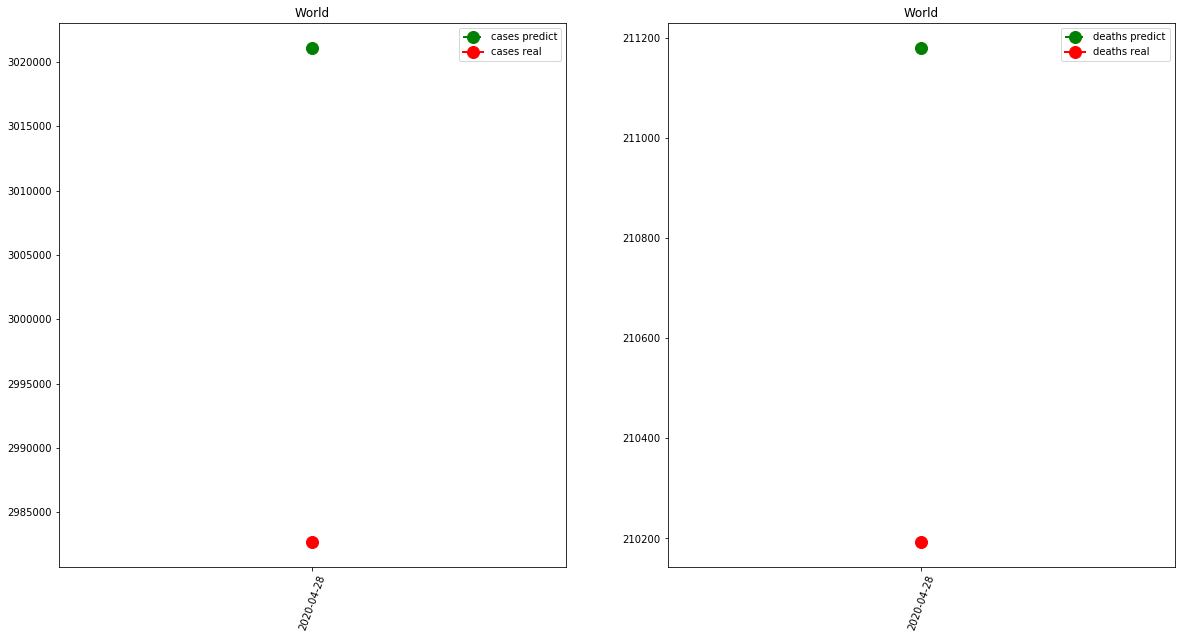

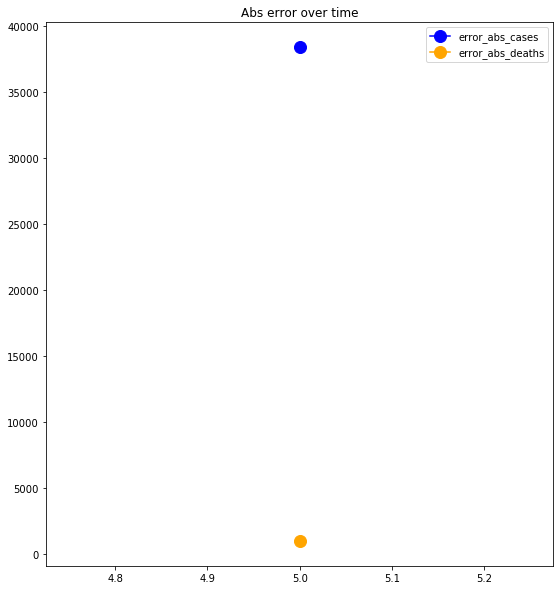

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  2633.0
RMSE =  2633.0
-- France performances for deaths --
MAPE =  67.0
RMSE =  67.0


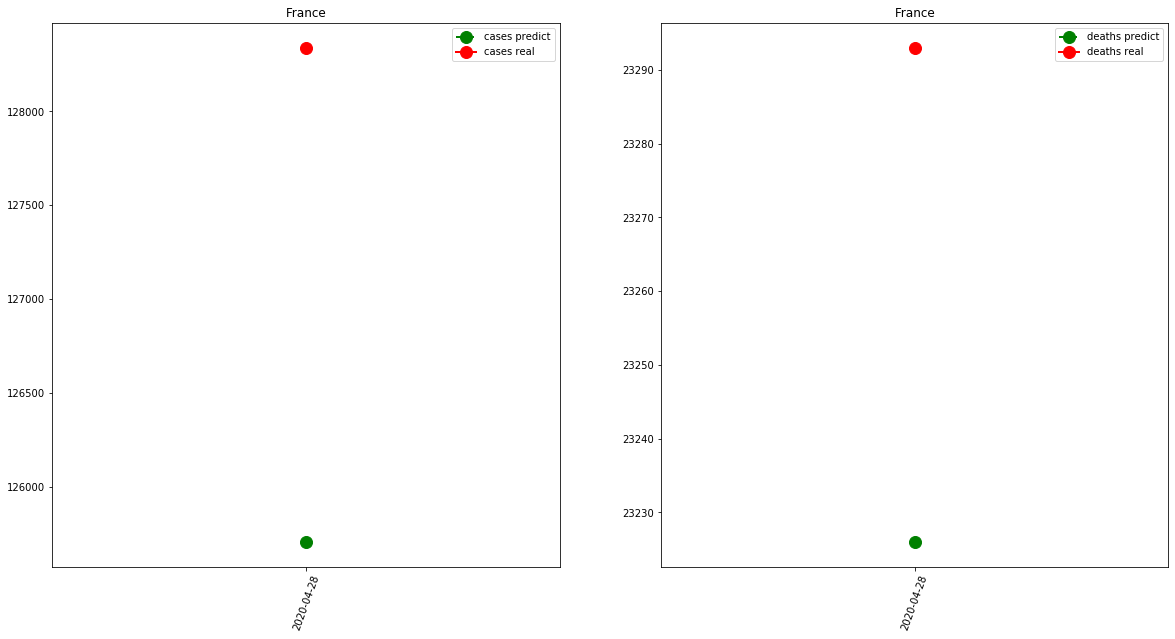

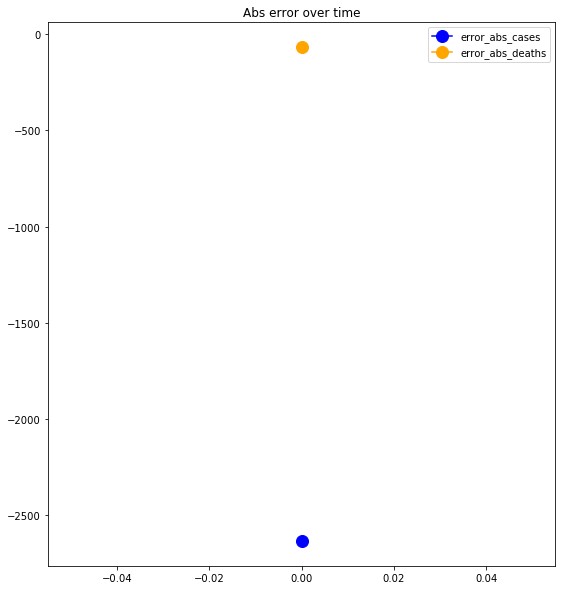

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  542.0
RMSE =  542.0
-- Italy performances for deaths --
MAPE =  54.0
RMSE =  54.0


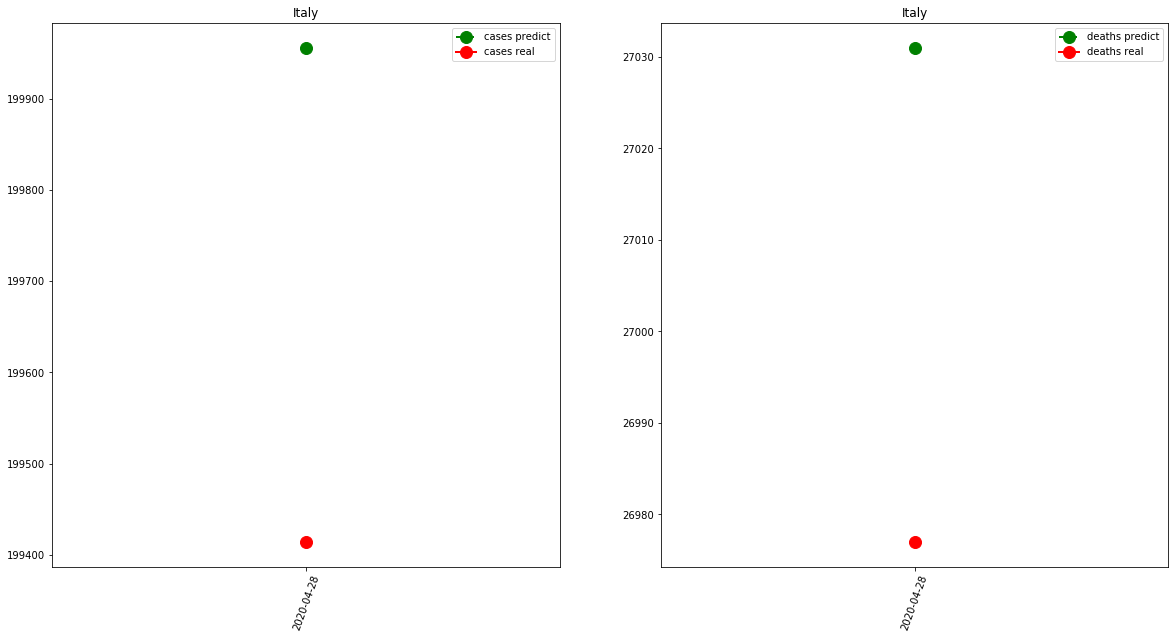

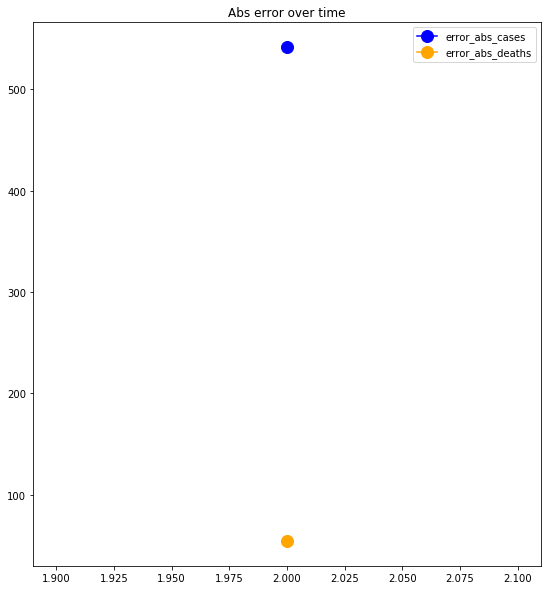

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  1144.0
RMSE =  1144.0
-- Spain performances for deaths --
MAPE =  182.0
RMSE =  182.0


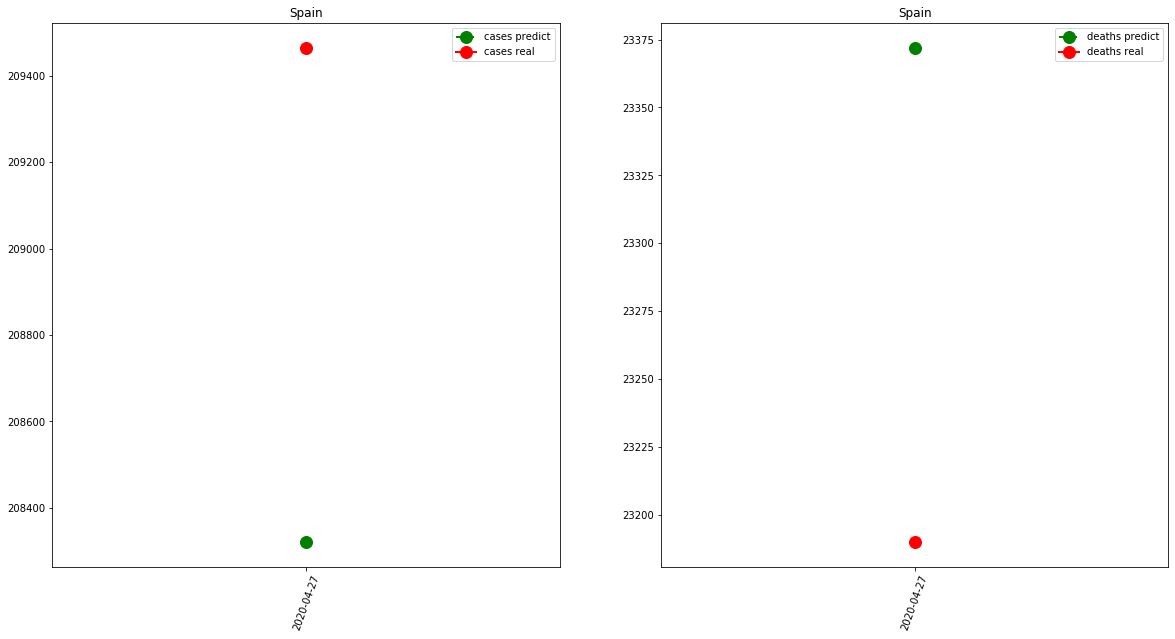

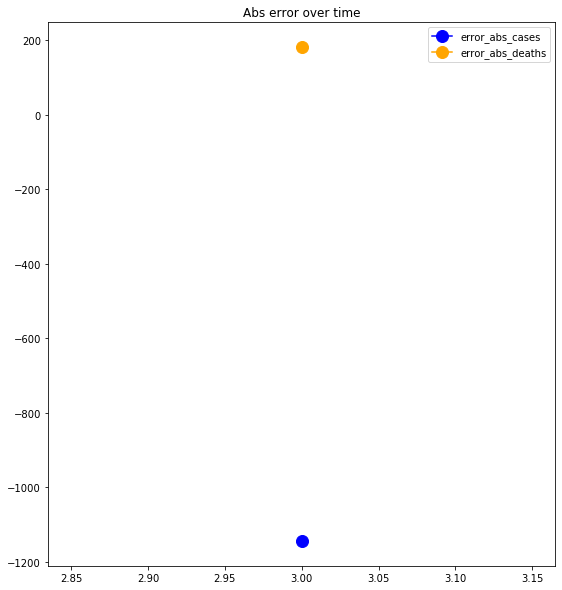

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  27939.0
RMSE =  27939.0
-- United States performances for deaths --
MAPE =  707.0
RMSE =  707.0


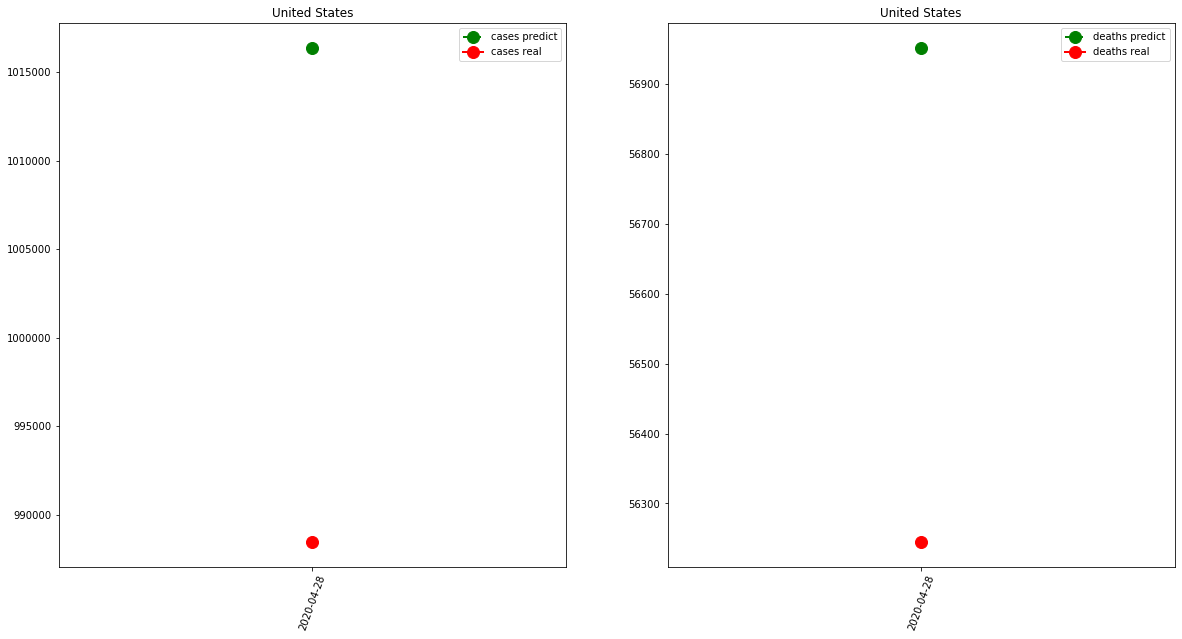

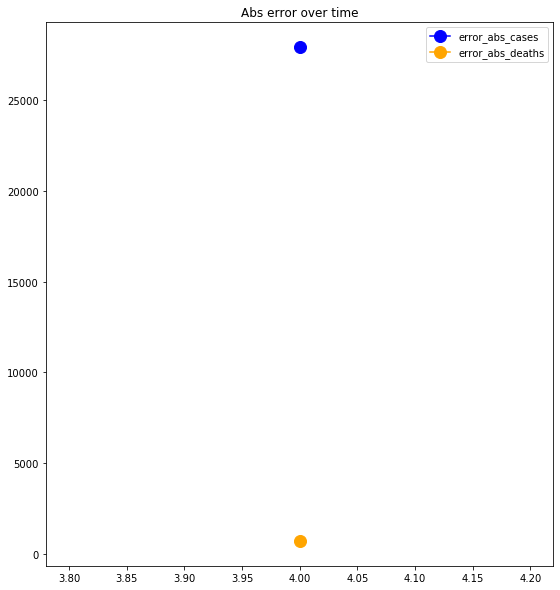

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  469.0
RMSE =  469.0
-- China performances for deaths --
MAPE =  36.0
RMSE =  36.0


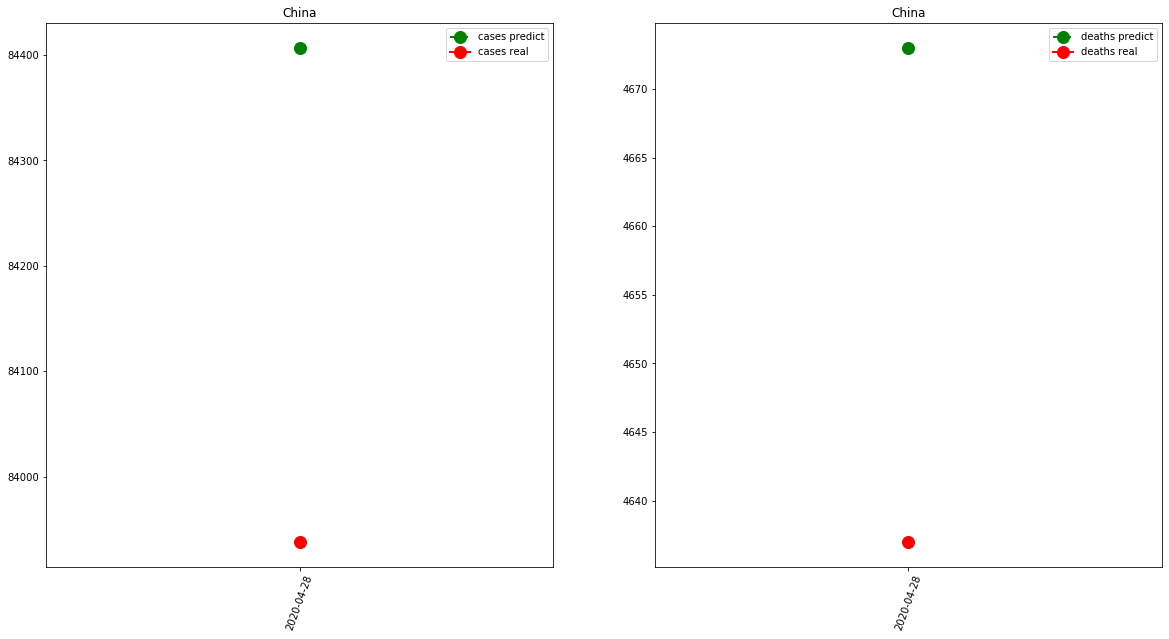

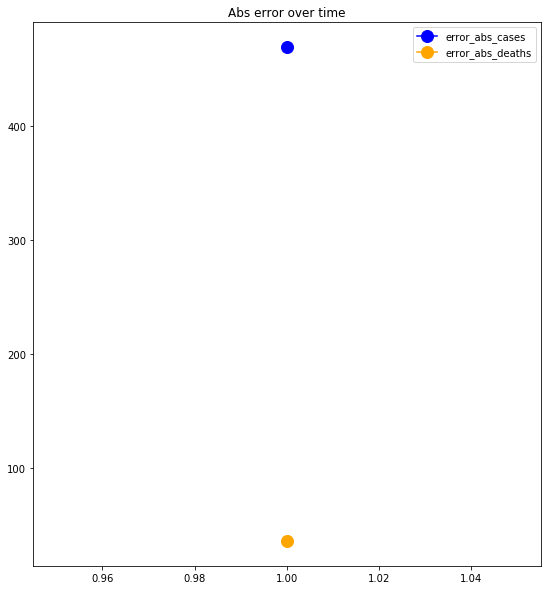

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  438.0
RMSE =  438.0
-- United Kingdom performances for deaths --
MAPE =  286.0
RMSE =  286.0


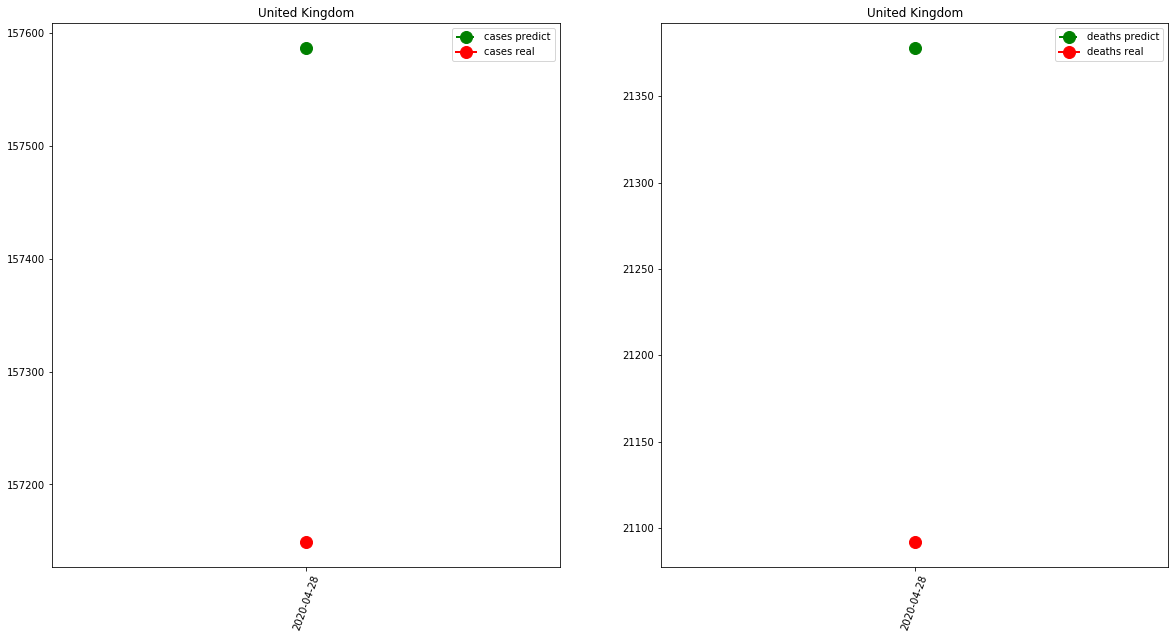

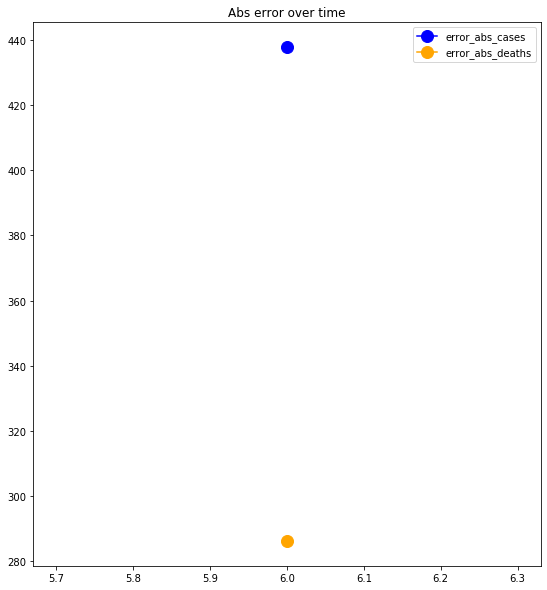

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  91.0
RMSE =  91.0
-- Germany performances for deaths --
MAPE =  50.0
RMSE =  50.0


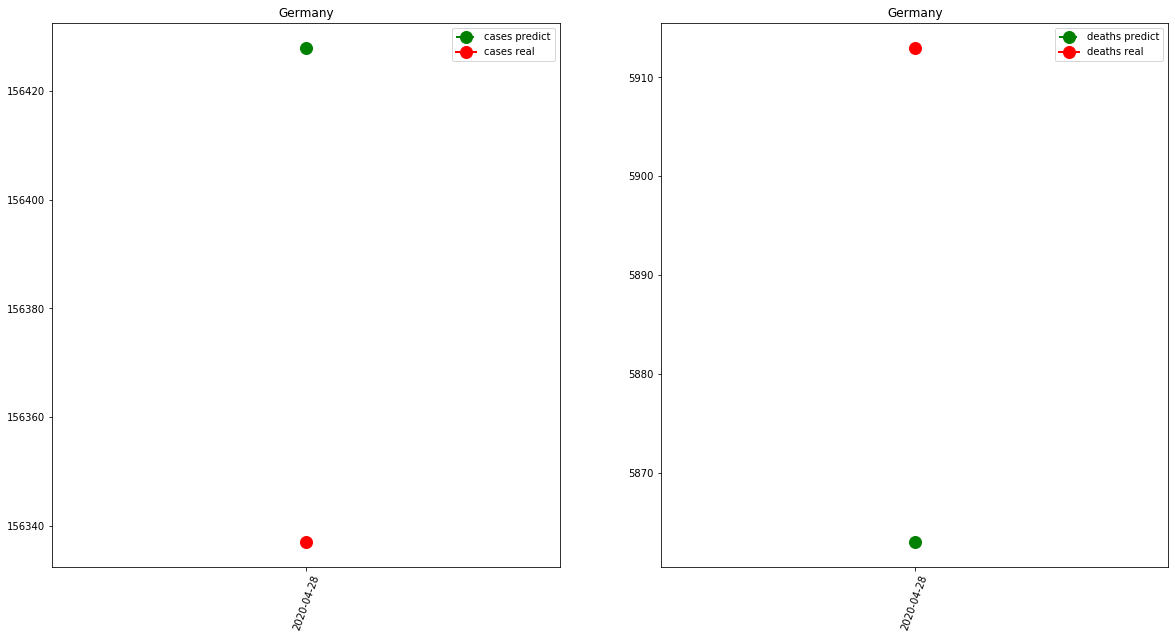

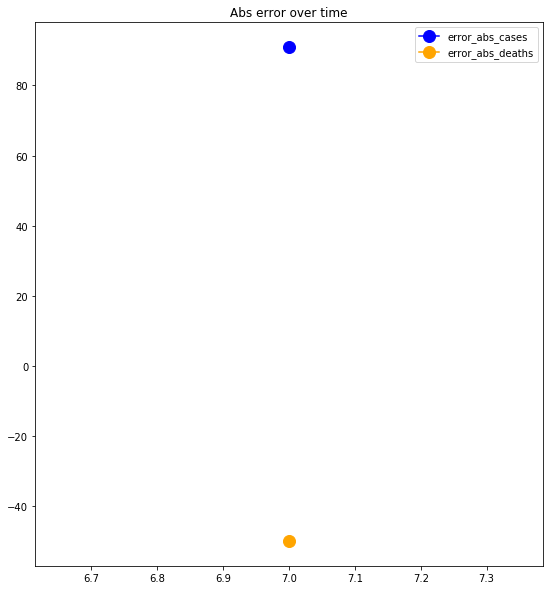

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  135.0
RMSE =  135.0
-- Iran performances for deaths --
MAPE =  26.0
RMSE =  26.0


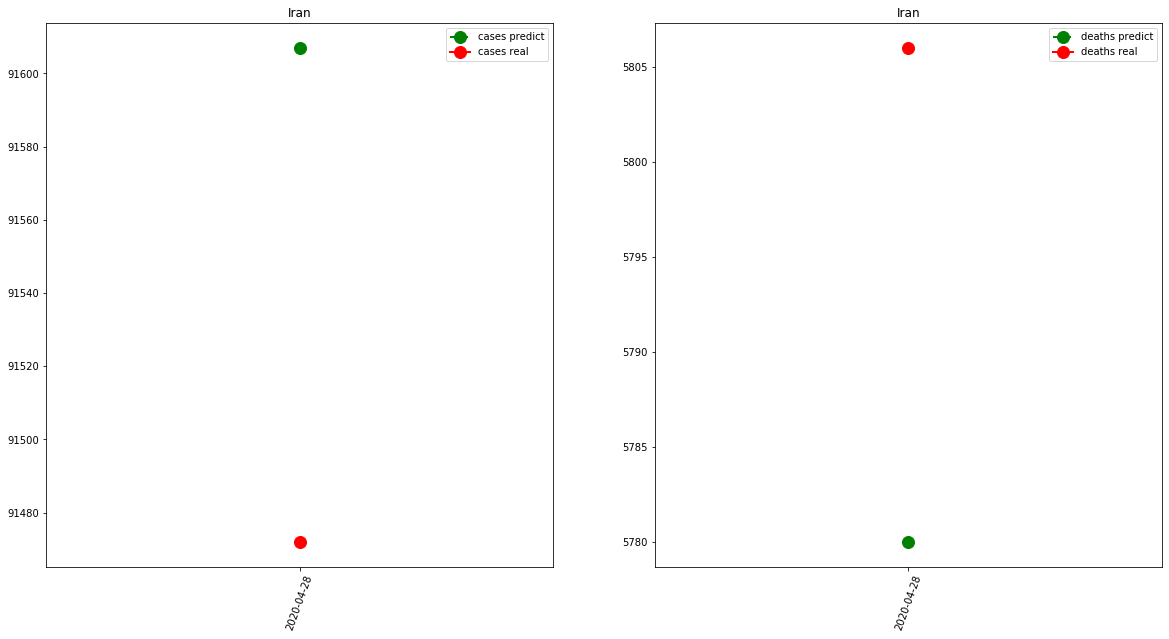

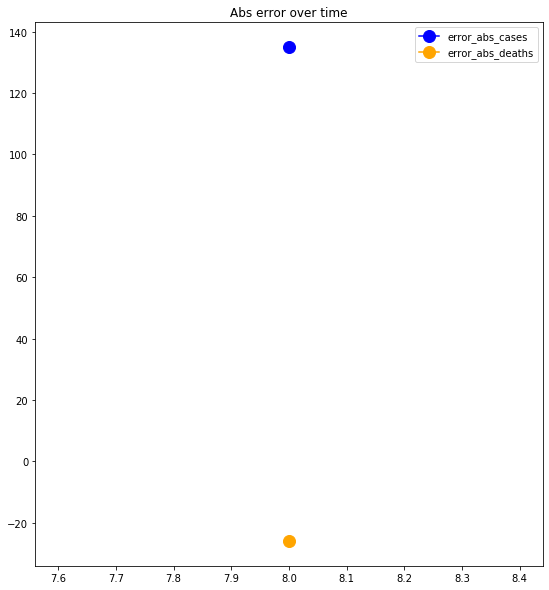

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  6.0
RMSE =  6.0
-- Turkey performances for deaths --
MAPE =  2.0
RMSE =  2.0


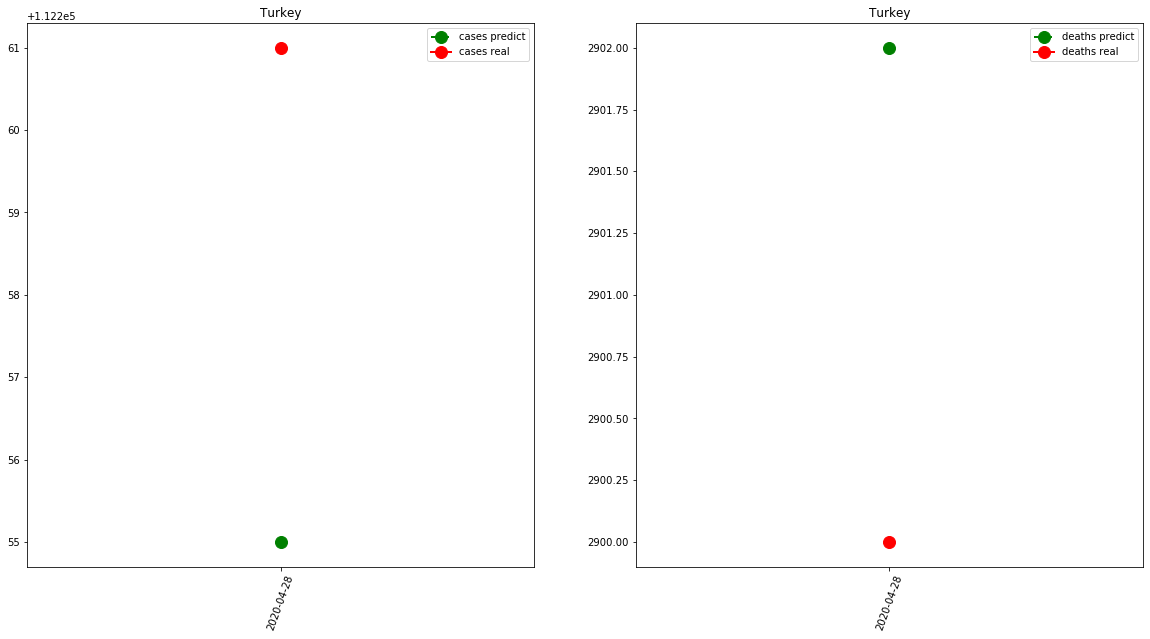

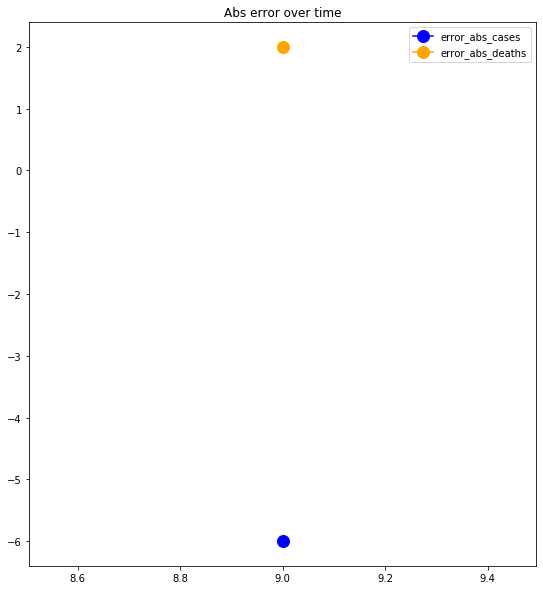

In [16]:
visShow("Turkey")

In [17]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)